In [1]:
%matplotlib qt

In [8]:
import noise3d.genseq as genseq
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


T= V = H = 50

seqt = genseq.genseq_t(T, V, H, 1, 1)
seqv = genseq.genseq_v(T, V, H, 1, 1)
seqh = genseq.genseq_h(T, V, H, 1, 1)

seqtv = genseq.genseq_tv(T, V, H, 1, 1)
seqth = genseq.genseq_th(T, V, H, 1, 1)
seqvh = genseq.genseq_vh(T, V, H, 1, 1)

seqtvh = genseq.genseq_tvh(T, V, H, 1, 1)

seq_tot = seqt + seqv + seqh + seqtv + seqth + seqvh+ seqtvh

v_min = np.min(seq_tot)
v_max = np.max(seq_tot)

# Parcourir les séquences

In [44]:
%matplotlib qt


import matplotlib.pyplot as plt


#plt.rcParams['keymap.<command>'] = ['<key1>', '<key2>']


ORDER = [-1, 1, 2, 5, 0, 3, 4, 6]
TITLES = ["tot", "v", "h", "vh", "t", "tv", "th", "tvh"]

list_seq = [seqt, seqv, seqh, seqtv, seqth, seqvh, seqtvh, seq_tot]
list_seq = [list_seq[i] for i in ORDER]

multi_slice_viewer(list_seq, TITLES)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


N = 4
volume = np.random.rand(N, N, N)

def voxel_display(seq):
    T, V, H = seq.shape
    filled = np.ones((T, V, H), dtype=np.bool)
    colors = np.repeat(seq[:, :, :, np.newaxis], 3, axis=3)
    
    fig = plt.figure()
    
    ax = fig.gca(projection='3d')
    ax.voxels(filled, facecolors=colors, edgecolors='k')

    plt.show()

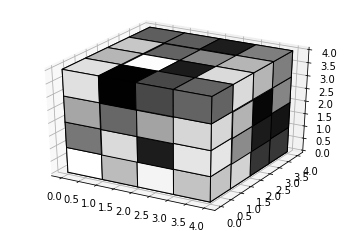

In [11]:
display3dseq(volume)

In [12]:
%matplotlib qt

import numpy as np


def display8seq(vec_seq, titles=False):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    T, V, H = vec_seq[0].shape
    filled_list = [np.ones((T, V, H), dtype=np.bool) for k in range(len(vec_seq))]
    
    v_min = np.min(vec_seq)
    v_max = np.max(vec_seq)
    colors = (vec_seq-v_min)/(v_max-v_min)
    #print(colors.shape)
    colors_list = [(np.repeat(seq[:, :, :, np.newaxis], 3, axis=3)-v_min)/(v_max-v_min) for seq in vec_seq]
    #print(colors_list)
    fig, axes_arr = plt.subplots(2, 4, subplot_kw=dict(projection='3d'))
    axes = axes_arr.flatten()
    #ax = fig.gca(projection='3d')
    for ax, i in zip(axes, range(len(vec_seq))):
        ax.voxels(filled_list[i], facecolors=colors_list[i])#, edgecolors='k')
        ax.set_xlabel('T axis')
        ax.set_ylabel('V axis')
        ax.set_zlabel('H axis')
        ax.set_xticks([]) 
        ax.set_yticks([]) 
        ax.set_zticks([])
        #plt.tight_layout()

        if titles:
            ax.set_title(titles[i])


In [13]:
display8seq(list_seq, title_list)



# Affichage d'une seq

In [1]:
import noise3d
import numpy as np
import matplotlib.pyplot as plt


from noise3d import disp
from noise3d import genseq


T = 200
V = 200
H = 200



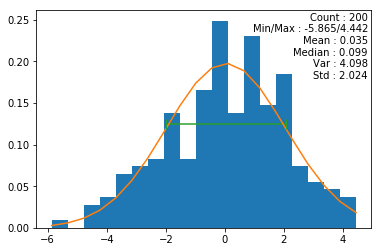

In [2]:
mu = 0
sigma = 2

fig= plt.subplot()
ax = plt.gca()
seq = genseq.genseq_v(200, 200, 200, mu, sigma)
seq = noise3d.opr.dt(noise3d.opr.dh(seq))
ax = disp.histo_seq(ax, seq, fit=True, stats_on=True, stats_print=False, print_CI=False, nbin=20, density=True)


# Affichage de toutes les séquences

In [3]:
sigmas = (1, 0, 0, 1, 0, 0, 1)
seq3d = noise3d.genseq.genseq_3dnoise_seq(T, V, H, sigmas)
#seqs = noise3d.opr.get_all_3d_noise_seq_fast(seq3d)

In [4]:
#seqs = noise3d.genseq.genseq_all_seq(T, V, H, sigmas)
#seq = genseq.genseq_3dnoise_seq(T, V, H, (1, 0, 1, 0, 0, 0, 0))
#seqs = list(noise3d.genseq.genseq_all_seq(T, V, H, (0, 1, 0, 0, 0, 0, 0)))
#seq = seqs[-1]
#seqs = noise3d.opr.get_all_3d_noise_seq_fast(seq)
#seqs = noise3d.opr.get_all_3d_noise_seq(seq)
#print(noise3d.noise.get_all_3D_noise_var(seq))
#print(noise3d.noise.get_all_3d_noise_var_fast(seq))
#print(noise3d.noise.get_all_3d_classic_var_matrix(seq))
#print(noise3d.noise.get_all_3d_corrected_var_matrix(seq))

In [5]:
#print(noise3d.noise.get_all_3D_noise_var(seq_tot))
#print(noise3d.noise.get_all_3D_noise_var(seqs[-1]))

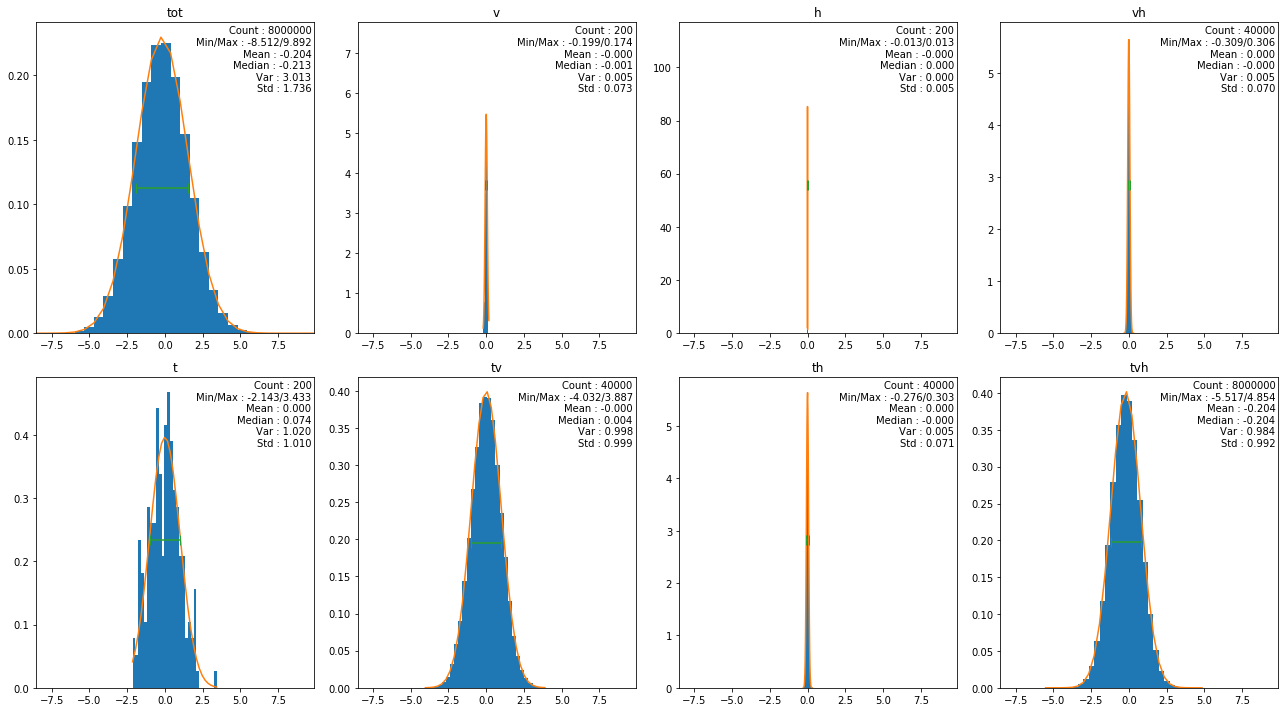

In [6]:
disp.display_8seq(seq3d, fit=True, stats_on=True, stats_print=False, print_CI=False, nbin=30, density=True, figsize=(18, 10), samex=True);

# Affichage des valeurs

In [7]:
import noise3d.noise as noise
import noise3d.disp as disp

print(disp.noise_resume(seq3d, pc=False, method="corrected"))

-------------------------------------------------
Mean : -0.204 | Var : 3.013 | Sum : -1628606.547
T : 200 | V : 200 |  H : 200 | Max error : -1.5%
---------------- corrected  ---------------------
$\sigma^2_tot$ :  3.018 | $\sigma^2_v$ :   0.000 | $\sigma^2_h$ :  -0.000 | $\sigma^2_vh$ :  -0.000
$\sigma^2_t$ :    1.015 | $\sigma^2_tv$ :  1.003 | $\sigma^2_th$ :  0.000 | $\sigma^2_tvh$ :  0.999 
-------------------------------------------------

